In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from scipy.stats import boxcox
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram




In [6]:
# Load the purchase data into a pandas DataFrame
data = pd.read_csv('CC GENERAL.csv')

In [7]:
print(data.head(10))

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000

In [8]:
data.describe

<bound method NDFrame.describe of      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANC

In [9]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
mean_value_creditlimit = data['CREDIT_LIMIT'].mean()

# Fill null values in the column with the mean value
data['CREDIT_LIMIT'].fillna(mean_value_creditlimit, inplace=True)

mean_value_minpayment = data['MINIMUM_PAYMENTS'].mean()

# Fill null values in the column with the mean value
data['MINIMUM_PAYMENTS'].fillna(mean_value_minpayment, inplace=True)

In [11]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
print(data.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

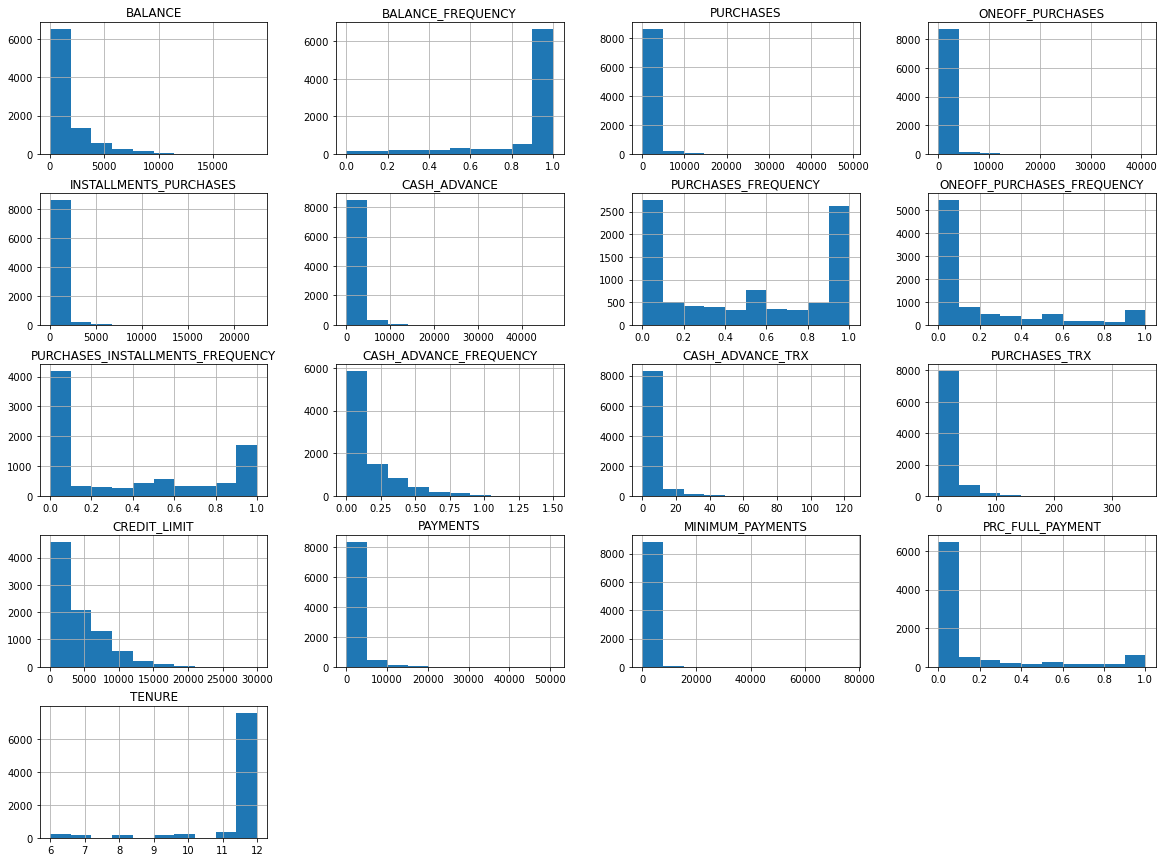

In [14]:
data.hist(bins=10, figsize=(20, 15))

<AxesSubplot:>

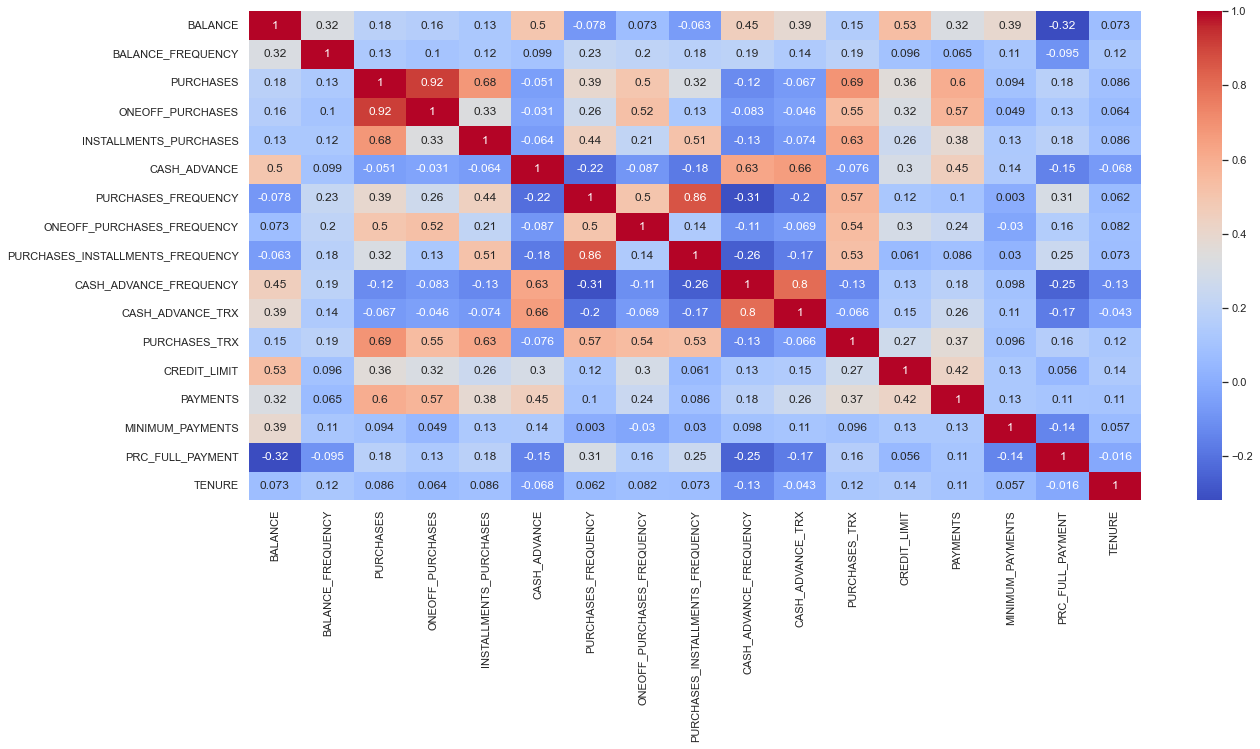

In [15]:
corr = data.corr()
sns.set(rc={'figure.figsize':(20,9)})

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [16]:
num_zeros_one = data['ONEOFF_PURCHASES'].value_counts()[0]

# Print the count of zero values
print('Number of zero values:', num_zeros_one)

Number of zero values: 4302


In [17]:
num_zeros_installment = data['INSTALLMENTS_PURCHASES'].value_counts()[0]

# Print the count of zero values
print('Number of zero values:', num_zeros_installment)

Number of zero values: 3916


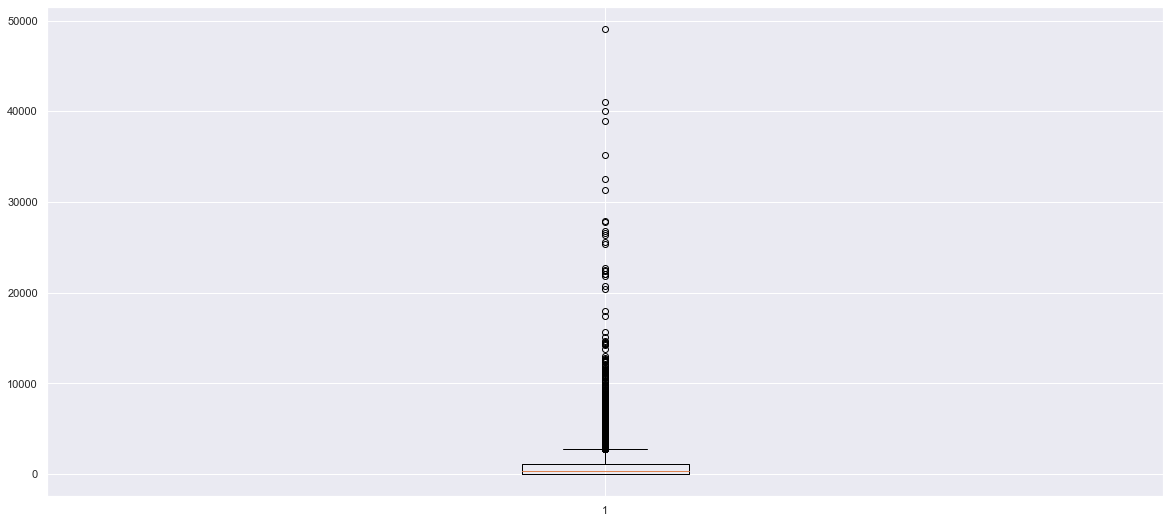

In [18]:
plt.boxplot(data['PURCHASES'])
plt.show()


In [19]:
skewness = data.skew()
skewed_variables = skewness[abs(skewness) > 0.5].index

for var in skewed_variables:
    data[var], _ = boxcox(data[var]+1)
    
skewness_new = data.skew()


/var/folders/dk/jt24tkjd45b9nn985s2xh4tr0000gn/T/ipykernel_90113/3223068692.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = data.skew()
/var/folders/dk/jt24tkjd45b9nn985s2xh4tr0000gn/T/ipykernel_90113/3223068692.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness_new = data.skew()


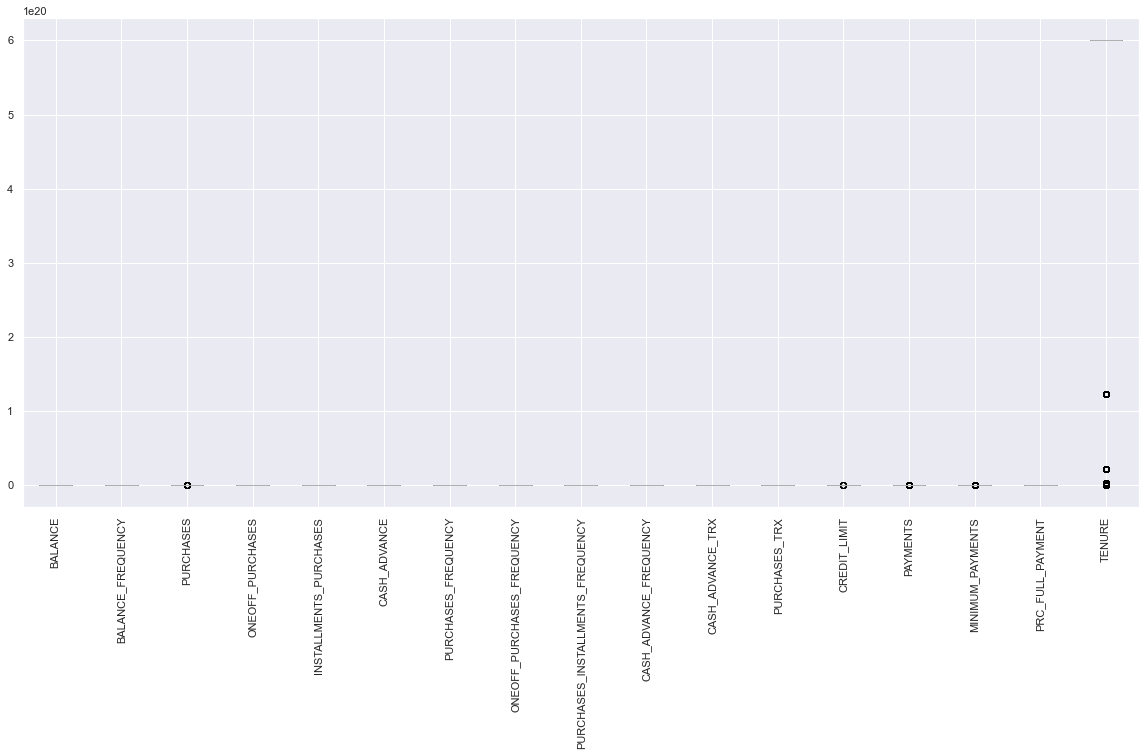

In [20]:
data.boxplot()
plt.xticks(rotation='vertical')

plt.show()

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

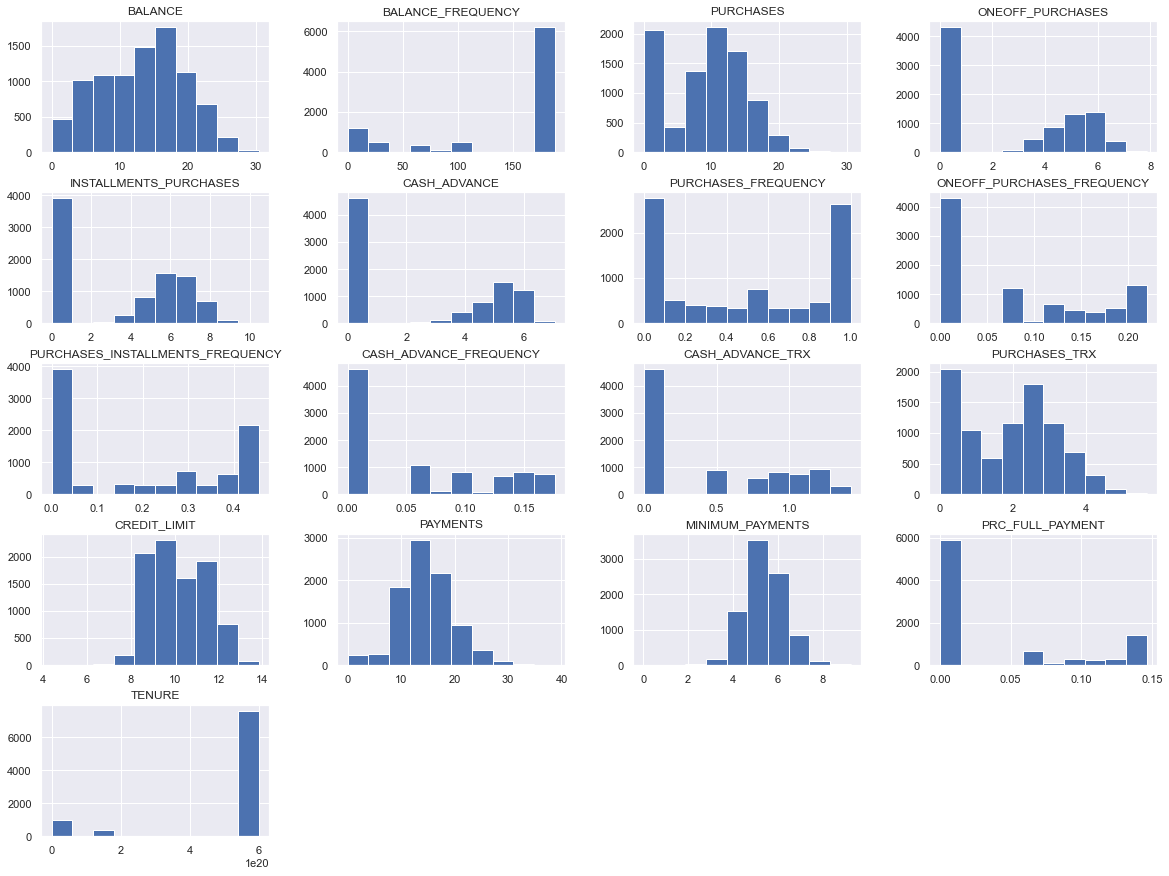

In [21]:
data.hist(bins=10, figsize=(20, 15))

<AxesSubplot:>

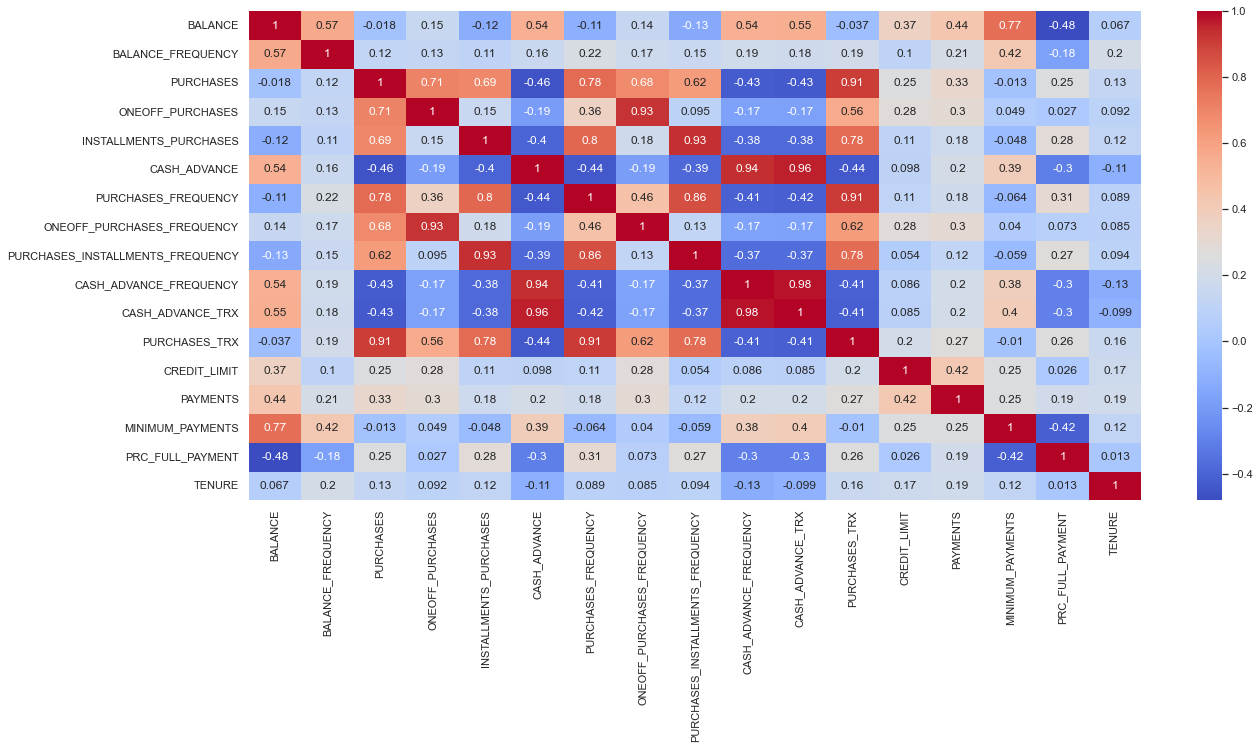

In [22]:
corr = data.corr()
sns.set(rc={'figure.figsize':(20,9)})

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [23]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,5.524100,65.664749,6.874084,0.000000,4.656581,0.000000,0.166667,0.000000,0.075975,0.000000,0.000000,1.090792,8.387345,9.475916,4.528139,0.000000,6.000041e+20
1,C10002,19.863823,112.456048,0.000000,0.000000,0.000000,6.190043,0.000000,0.000000,0.000000,0.126824,0.980624,0.000000,11.375912,21.433773,6.167280,0.109766,6.000041e+20
2,C10003,18.665676,187.786550,12.252611,5.492713,0.000000,0.000000,1.000000,0.219919,0.000000,0.000000,0.000000,2.522588,11.487826,13.123323,5.747176,0.000000,6.000041e+20
3,C10004,16.849317,20.511329,14.393644,5.929219,0.000000,4.290456,0.083333,0.067672,0.000000,0.064389,0.553324,0.690028,11.487826,0.000000,5.999159,0.000000,6.000041e+20
4,C10005,13.977587,187.786550,3.629361,2.607174,0.000000,0.000000,0.083333,0.067672,0.000000,0.000000,0.000000,0.690028,8.653989,13.439780,4.991037,0.000000,6.000041e+20


In [24]:
data_types = data.dtypes

# Filter for categorical columns
categorical_cols = data_types[data_types == 'object'].index.tolist()

# Print the categorical columns
print(categorical_cols)

['CUST_ID']


In [25]:
# Standardize the numerical features
scaler = StandardScaler()
num_cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
data_nums = scaler.fit_transform(data[num_cols])

# Apply PCA to the standardized data
pca = PCA(n_components=2)
pca.fit(data_nums)
pca_features = pca.transform(data_nums)
data["PC1"] = pca_features[:,0]
data["PC2"] = pca_features[:,1]

# Cluster the data using the PC1 and PC2 features
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data[["PC1", "PC2"]])
data["cluster"] = kmeans.labels_

# View the clusters
print(data["cluster"].value_counts())



2    2774
0    2495
1    2008
3    1673
Name: cluster, dtype: int64


In [26]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PC1,PC2,cluster
0,C10001,5.524100,65.664749,6.874084,0.000000,4.656581,0.000000,0.166667,0.000000,0.075975,...,0.000000,1.090792,8.387345,9.475916,4.528139,0.000000,6.000041e+20,-0.273233,-3.136096,2
1,C10002,19.863823,112.456048,0.000000,0.000000,0.000000,6.190043,0.000000,0.000000,0.000000,...,0.980624,0.000000,11.375912,21.433773,6.167280,0.109766,6.000041e+20,-3.450191,0.859262,0
2,C10003,18.665676,187.786550,12.252611,5.492713,0.000000,0.000000,1.000000,0.219919,0.000000,...,0.000000,2.522588,11.487826,13.123323,5.747176,0.000000,6.000041e+20,1.354808,1.180552,1
3,C10004,16.849317,20.511329,14.393644,5.929219,0.000000,4.290456,0.083333,0.067672,0.000000,...,0.553324,0.690028,11.487826,0.000000,5.999159,0.000000,6.000041e+20,-1.464356,-0.218200,0
4,C10005,13.977587,187.786550,3.629361,2.607174,0.000000,0.000000,0.083333,0.067672,0.000000,...,0.000000,0.690028,8.653989,13.439780,4.991037,0.000000,6.000041e+20,-1.005279,-1.425756,2


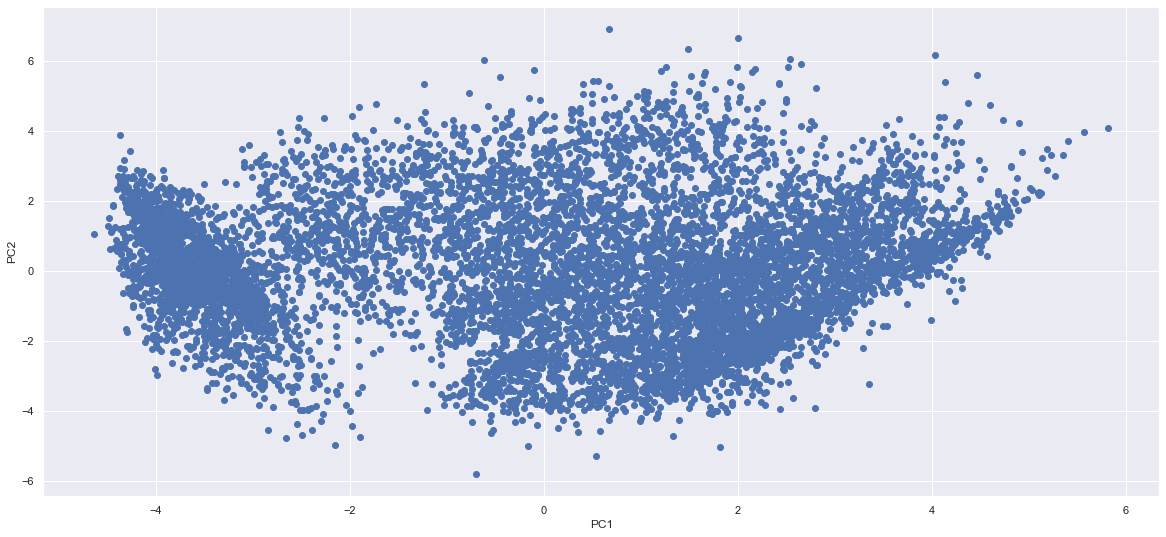

In [27]:
plt.scatter(pca_features[:, 0], pca_features[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [28]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(pca_features)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

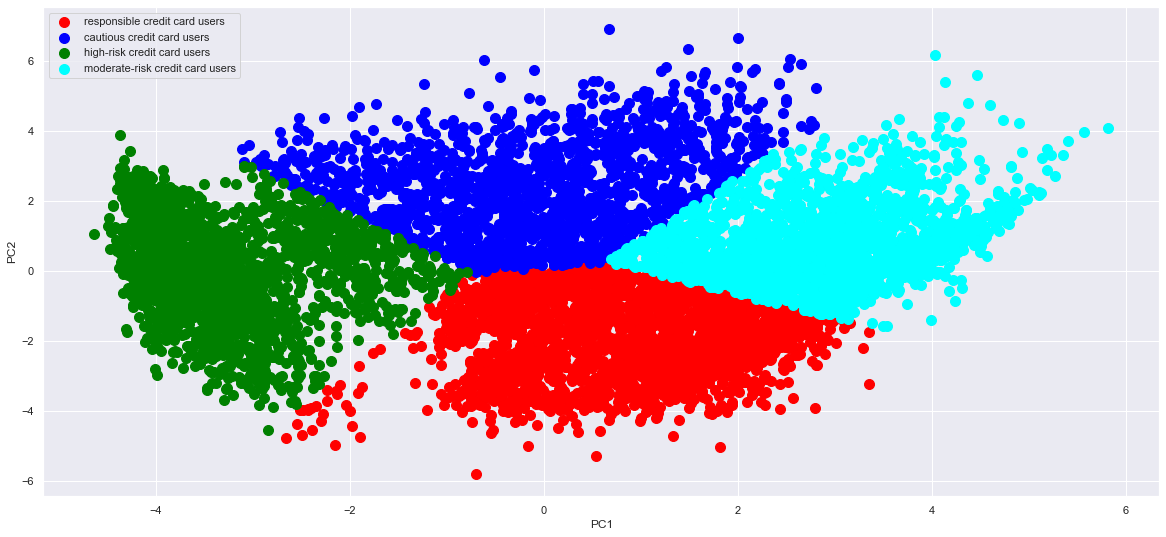

In [29]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
cluster_labels = km.fit_predict(pca_features)

# add the cluster labels to the original dataset
data['cluster'] = km.labels_

# visualize the clusters in the reduced-dimensional space
plt.scatter(pca_features[data['cluster'] == 0, 0], pca_features[data['cluster'] == 0, 1], s=100, c='red', label='responsible credit card users')
plt.scatter(pca_features[data['cluster'] == 1, 0], pca_features[data['cluster'] == 1, 1], s=100, c='blue', label='cautious credit card users')
plt.scatter(pca_features[data['cluster'] == 2, 0], pca_features[data['cluster'] == 2, 1], s=100, c='green', label='high-risk credit card users')
plt.scatter(pca_features[data['cluster'] == 3, 0], pca_features[data['cluster'] == 3, 1], s=100, c='cyan', label='moderate-risk credit card users')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

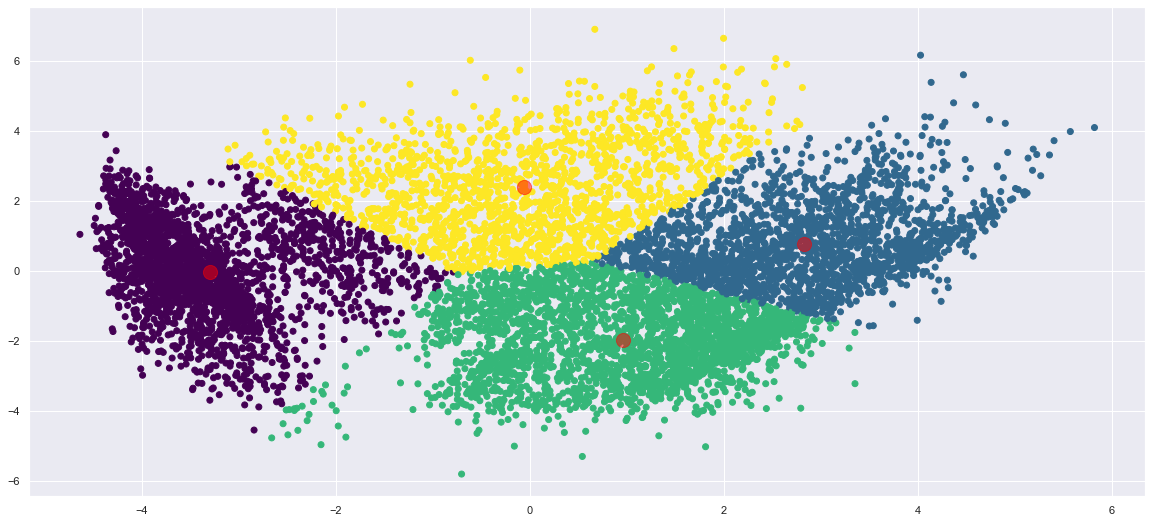

In [30]:
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.show()

In [31]:
svm_model = svm.SVC(kernel='linear', C=1.0)
svm_model.fit(pca_features, kmeans.labels_)

SVC(kernel='linear')

In [32]:
cluster_svm = svm_model.predict(pca_features)

# Add the clusters to the original dataset
data['Cluster'] = cluster_svm


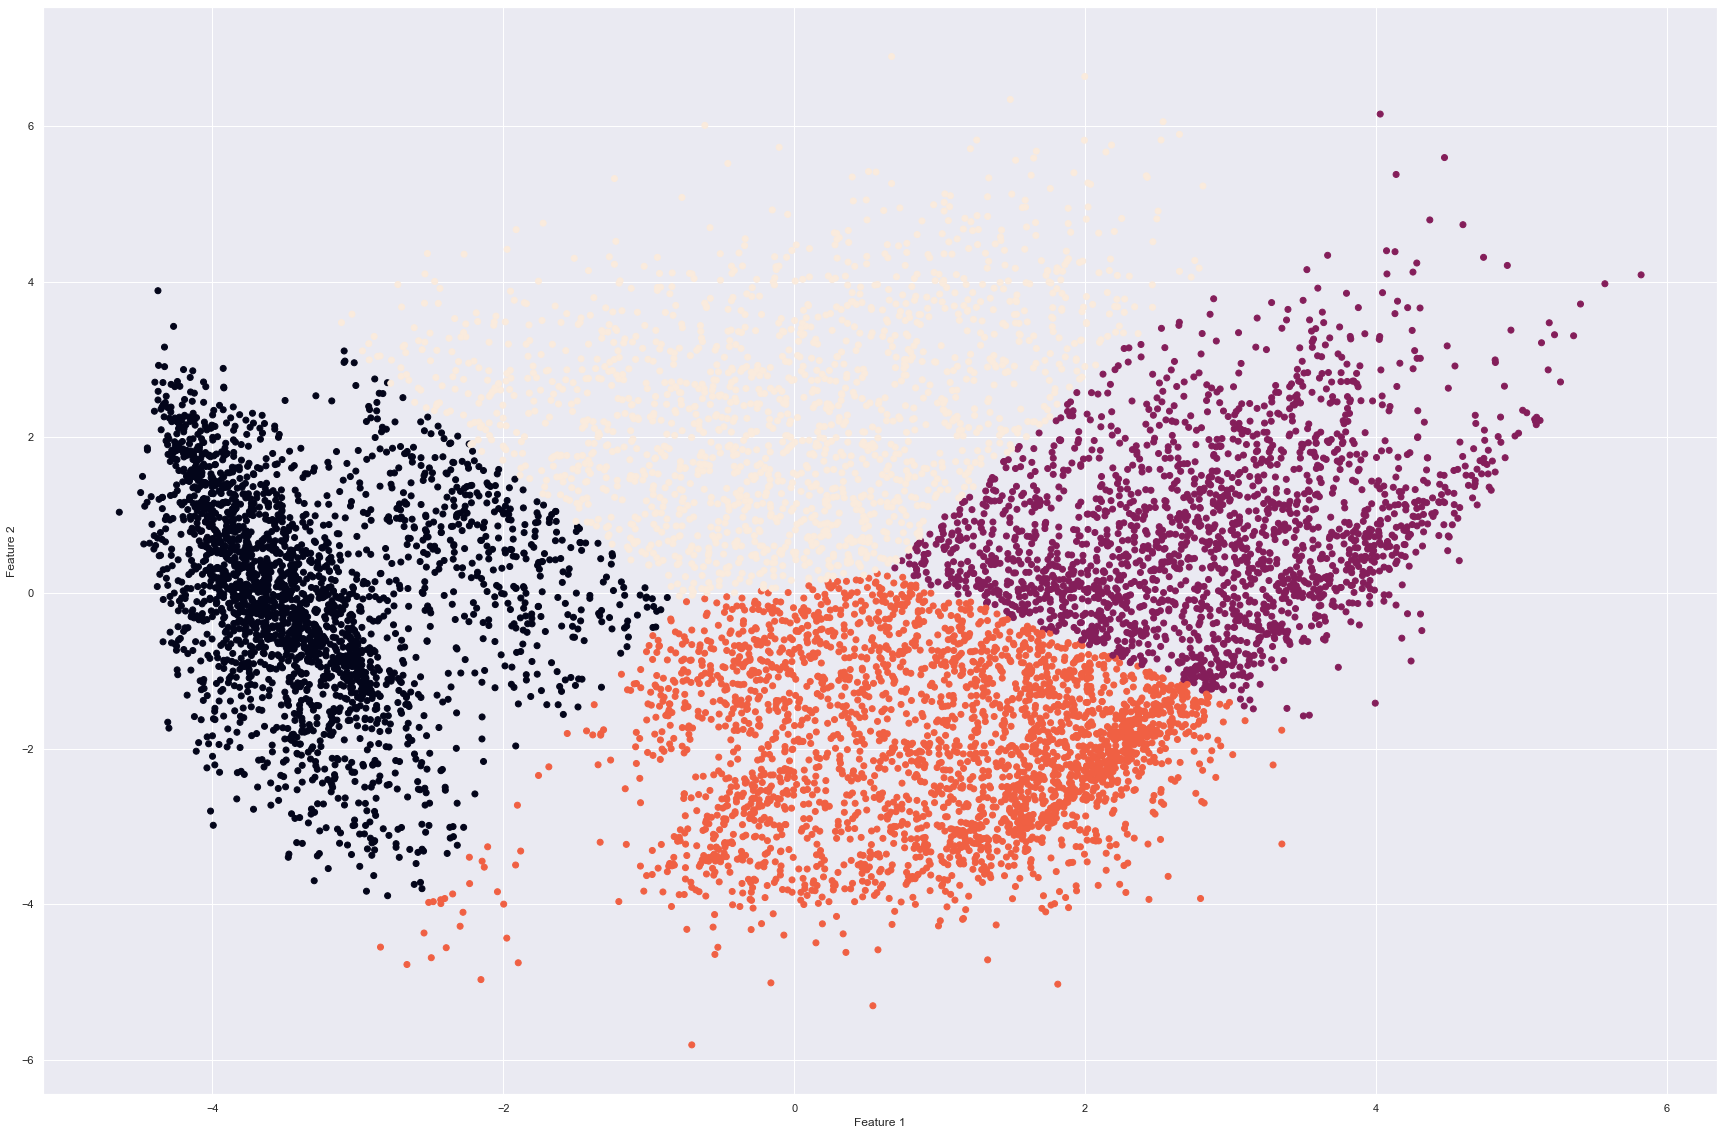

In [33]:
plt.figure(figsize=(30,20))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_svm)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering

# Create hierarchical clustering model with 5 clusters
hc_model = AgglomerativeClustering(n_clusters=4)
hc_clusters = hc_model.fit_predict(data_nums)


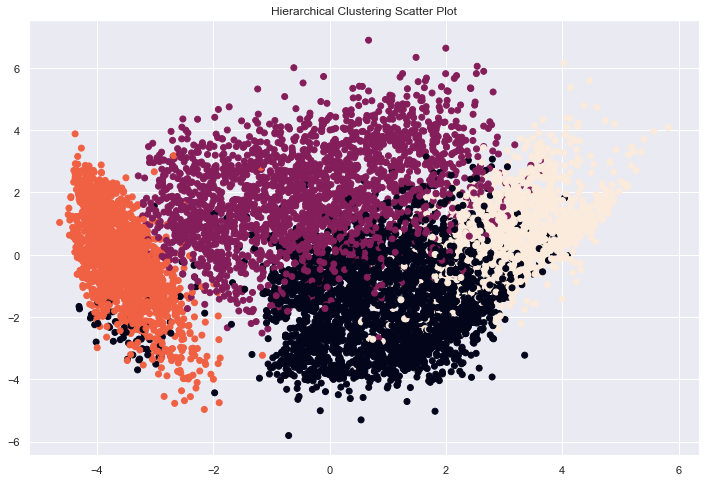

In [43]:
plt.figure(figsize=(12, 8))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=hc_clusters)
plt.title("Hierarchical Clustering Scatter Plot")

plt.show()

In [36]:
from sklearn.cluster import DBSCAN

# Create DBSCAN model with eps=2 and min_samples=5
dbscan_model = DBSCAN(eps = 2,min_samples=5 )
dbscan_clusters = dbscan_model.fit_predict(data_nums)


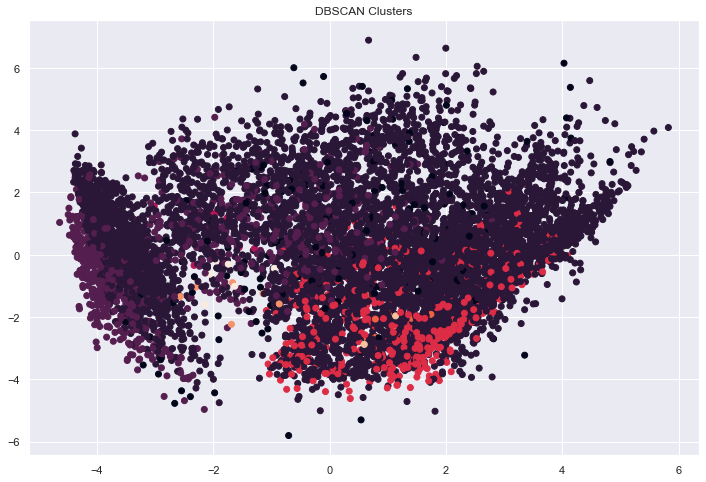

In [42]:
plt.figure(figsize=(12, 8))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=dbscan_clusters)
plt.title("DBSCAN Clusters")
plt.show()

In [38]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

hc_silhouette = silhouette_score(data_nums, hc_clusters)
hc_calinski_harabasz = calinski_harabasz_score(data_nums, hc_clusters)
hc_davies_bouldin = davies_bouldin_score(data_nums, hc_clusters)

In [39]:
dbscan_silhouette = silhouette_score(data_nums, dbscan_clusters)
dbscan_calinski_harabasz = calinski_harabasz_score(data_nums, dbscan_clusters)
dbscan_davies_bouldin = davies_bouldin_score(data_nums, dbscan_clusters)

In [40]:
kmeans_silhouette = silhouette_score(data_nums, cluster_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(data_nums, cluster_labels)
kmeans_davies_bouldin = davies_bouldin_score(data_nums, cluster_labels)

In [41]:
print("Hierarchical Clustering\n-----------------------")
print("Silhouette Score: ", hc_silhouette)
print("Calinski-Harabasz Score: ", hc_calinski_harabasz)
print("Davies-Bouldin Score: ", hc_davies_bouldin)

print("\nDBSCAN\n------")
print("Silhouette Score: ", dbscan_silhouette)
print("Calinski-Harabasz Score: ", dbscan_calinski_harabasz)
print("Davies-Bouldin Score: ", dbscan_davies_bouldin)

print("\nK-Means\n-------")
print("Silhouette Score: ", kmeans_silhouette)
print("Calinski-Harabasz Score: ", kmeans_calinski_harabasz)
print("Davies-Bouldin Score: ", kmeans_davies_bouldin)

Hierarchical Clustering
-----------------------
Silhouette Score:  0.1776267258251992
Calinski-Harabasz Score:  2148.5784939799446
Davies-Bouldin Score:  1.7456266078269018

DBSCAN
------
Silhouette Score:  -0.1097193537858338
Calinski-Harabasz Score:  130.40818098015063
Davies-Bouldin Score:  2.420377885615988

K-Means
-------
Silhouette Score:  0.2125625701520273
Calinski-Harabasz Score:  2466.552277981436
Davies-Bouldin Score:  1.6587687919056353
